dataset available at http://jmcauley.ucsd.edu/data/amazon/. We choose to analyse how customer feedback from clothing departement is, 
where  
* reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B  
* asin - ID of the product, e.g. 0000013714  
* reviewerName - name of the reviewer  
* helpful - helpfulness rating of the review, e.g. 2/3  
* reviewText - text of the review  
* overall - rating of the product  
* summary - summary of the review  
* unixReviewTime - time of the review (unix time)  
* reviewTime - time of the review (raw)  


# Data Preparation
import the libraries that we need and the data, transform data into new feature that we want

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [2]:
#Read the file and add new columns helpfulnessnumerator and helpfulnessdenominator, so we can measure how helpful the review is
reviews = pd.read_json('data_amazon.json',lines=True)
reviews[['Helpful','Total_whethernot_helpful']] = pd.DataFrame(reviews.helpful.values.tolist(), index = reviews.index)

In [3]:
reviews.shape

(278677, 11)

In [4]:
reviews.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Helpful,Total_whethernot_helpful
0,0000031887,"[0, 0]",5,This is a great tutu and at a really great pri...,"02 12, 2011",A1KLRMWW2FWPL4,"Amazon Customer ""cameramom""",Great tutu- not cheaply made,1297468800,0,0
1,0000031887,"[0, 0]",5,I bought this for my 4 yr old daughter for dan...,"01 19, 2013",A2G5TCU2WDFZ65,Amazon Customer,Very Cute!!,1358553600,0,0
2,0000031887,"[0, 0]",5,What can I say... my daughters have it in oran...,"01 4, 2013",A1RLQXYNCMWRWN,Carola,I have buy more than one,1357257600,0,0
3,0000031887,"[0, 0]",5,"We bought several tutus at once, and they are ...","04 27, 2014",A8U3FAMSJVHS5,Caromcg,"Adorable, Sturdy",1398556800,0,0
4,0000031887,"[0, 0]",5,Thank you Halo Heaven great product for Little...,"03 15, 2014",A3GEOILWLK86XM,CJ,Grammy's Angels Love it,1394841600,0,0


In [7]:
#Cleaning the data by eliminating duplicates
reviews.drop_duplicates(subset=['reviewerID', 'asin','unixReviewTime'],inplace=True)

#Adding the helpfulness and upvote percentages for metrics
reviews['Helpful %'] = np.where(reviews['Total_whethernot_helpful'] > 0, reviews['Helpful'] / reviews['Total_whethernot_helpful'], -1)
reviews['% Upvote'] = pd.cut(reviews['Helpful %'], bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'], include_lowest = True)
reviews['Id'] = reviews.index;
reviews

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Helpful,Total_whethernot_helpful,Helpful %,% Upvote,Id,usefulScore
0,0000031887,"[0, 0]",5,This is a great tutu and at a really great pri...,"02 12, 2011",A1KLRMWW2FWPL4,"Amazon Customer ""cameramom""",Great tutu- not cheaply made,1297468800,0,0,-1.000000,Empty,0,useless
1,0000031887,"[0, 0]",5,I bought this for my 4 yr old daughter for dan...,"01 19, 2013",A2G5TCU2WDFZ65,Amazon Customer,Very Cute!!,1358553600,0,0,-1.000000,Empty,1,useless
2,0000031887,"[0, 0]",5,What can I say... my daughters have it in oran...,"01 4, 2013",A1RLQXYNCMWRWN,Carola,I have buy more than one,1357257600,0,0,-1.000000,Empty,2,useless
3,0000031887,"[0, 0]",5,"We bought several tutus at once, and they are ...","04 27, 2014",A8U3FAMSJVHS5,Caromcg,"Adorable, Sturdy",1398556800,0,0,-1.000000,Empty,3,useless
4,0000031887,"[0, 0]",5,Thank you Halo Heaven great product for Little...,"03 15, 2014",A3GEOILWLK86XM,CJ,Grammy's Angels Love it,1394841600,0,0,-1.000000,Empty,4,useless
5,0000031887,"[0, 0]",4,I received this today and I'm not a fan of it ...,"03 31, 2014",A27UF1MSF3DB2,"C-Lo ""Cynthia""",It's ok,1396224000,0,0,-1.000000,Empty,5,useless
6,0000031887,"[0, 0]",5,Bought this as a backup to the regular ballet ...,"05 3, 2014",A16GFPNVF4Y816,design maven,Great for dress-up and for ballet practice,1399075200,0,0,-1.000000,Empty,6,useless
7,0000031887,"[0, 0]",5,Great tutu for a great price. It isn't a &#34;...,"12 23, 2012",A2M2APVYIB2U6K,Jamie P.,Great value,1356220800,0,0,-1.000000,Empty,7,useless
8,0000031887,"[0, 0]",4,"My daughter liked this, and it with her costum...","11 10, 2013",A1NJ71X3YPQNQ9,JBerger,Good,1384041600,0,0,-1.000000,Empty,8,useless
9,0000031887,"[7, 8]",5,For what I paid for two tutus is unbeatable an...,"10 7, 2012",A3EERSWHAI6SO,"Jeffrey Hollingshead ""Jillian hollingshead""",WOW !! ..is all I have to say!,1349568000,7,8,0.875000,80-100%,9,useful


In [8]:
reviews["usefulScore"] = (reviews["Helpful"]/reviews["Total_whethernot_helpful"]).apply(lambda n: "useful" if n > 0.8 else "useless")

In [9]:
df_s = reviews.groupby(['overall', '% Upvote']).agg({'Id': 'count'})
df_s = df_s.unstack()
df_s.columns = df_s.columns.get_level_values(1)

In [10]:
df_s

% Upvote,Empty,0-20%,20-40%,40-60%,60-80%,80-100%
overall,,,,,,
1,6368,115,344,868,833,2664
2,10305,47,207,823,744,3337
3,21679,39,233,1162,1160,6152
4,43164,17,139,1548,1509,11980
5,121377,24,299,3686,3896,33957


In [11]:
import re
regEx = re.compile('[^a-z]+') #besides alphabet
def cleanReviews(reviewText):
    reviewText = reviewText.lower()
    reviewText = regEx.sub(' ', reviewText).strip() #replace regEX with space ' ' and remove spaces at the begining and end of the review
    return reviewText

reviews['newsumma']=reviews["summary"].apply(cleanReviews)

In [12]:
df =  reviews[reviews['overall'] != 3]
X = df['newsumma']
y_dict = {1:0, 2:0, 4:1, 5:1} # 0 = negative ; 1 = positive
y = df['overall'].map(y_dict)

In [13]:
y.value_counts()

1    221597
0     26655
Name: overall, dtype: int64

__check if theres any missing value__

In [14]:
reviews.isna().sum()

asin                          0
helpful                       0
overall                       0
reviewText                    0
reviewTime                    0
reviewerID                    0
reviewerName                452
summary                       0
unixReviewTime                0
Helpful                       0
Total_whethernot_helpful      0
Helpful %                     0
% Upvote                      1
Id                            0
usefulScore                   0
newsumma                      0
dtype: int64

We need to remove a row that has Helpful is less than Total_whethernot_helpful

In [15]:
reviews=reviews.dropna(subset=['% Upvote'])

In [16]:
reviews[reviews['% Upvote'].isna()]

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Helpful,Total_whethernot_helpful,Helpful %,% Upvote,Id,usefulScore,newsumma


__displaying most frequently used words in summary__

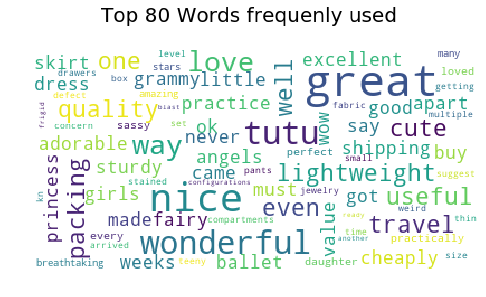

In [17]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=80,
        max_font_size=40, 
        random_state=1 
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=1.3)
    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(reviews['newsumma'],title='Top 80 Words frequenly used')

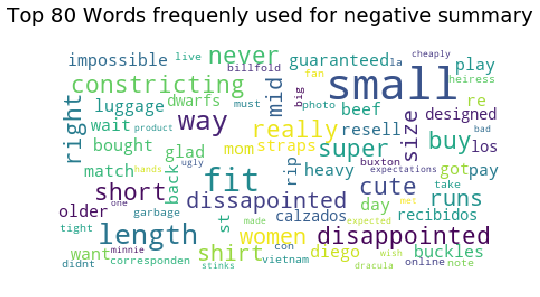

In [19]:
show_wordcloud(reviews['newsumma'][reviews['overall'].isin([1,2])],'Top 80 Words frequenly used for negative summary')

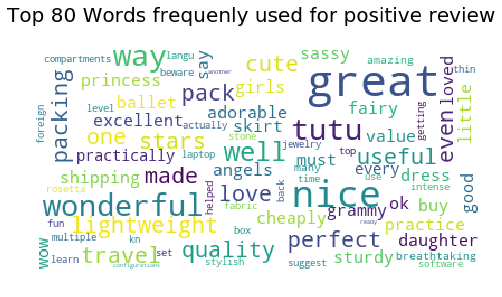

In [20]:
show_wordcloud(reviews['newsumma'][reviews['overall'].isin([4,5])],'Top 80 Words frequenly used for positive review')

# Model and Training

In [21]:
Xtrain, Xtest, ytrain,ytest = train_test_split(X,y, test_size=0.2,random_state=3)
print("%d items in training data, %d in test data" % (len(Xtrain), len(Xtest)))

198601 items in training data, 49651 in test data


In [22]:
countVector = CountVectorizer(stop_words='english',min_df = 1, ngram_range = (1, 4)) #min_df ignore words that appear in less than 1 document and ngram_range sets min_n&max_n for a sequence of N words
X_train_counts = countVector.fit_transform(Xtrain)

#applying tfidf to term frequency
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

X_new_counts = countVector.transform(Xtest)
X_test_tfidf = tfidf_transformer.transform(X_new_counts)

In [23]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Logistic Reg

In [24]:
X_train_tfidf.shape

(198601, 315020)

In [25]:
from sklearn.linear_model import LogisticRegression
prediction=dict()
logreg = LogisticRegression(C=1e5) #sronger regularization
logreg_result = logreg.fit(X_train_tfidf, ytrain)
prediction['Logistic'] = logreg_result.predict(X_test_tfidf)

/Users/devi/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn_01 = KNeighborsClassifier(n_neighbors = 5)
knn_re = knn_01.fit(X_train_tfidf,ytrain)
prediction['KNN'] = knn_re.predict(X_test_tfidf)

## __Multinomial Naive Bayes__

In [27]:
from sklearn.naive_bayes import MultinomialNB
m_nb = MultinomialNB().fit(X_train_tfidf, ytrain)
prediction['Multinomial'] = m_nb.predict(X_test_tfidf)

# Metrics for evaluation

In [28]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(ytest, prediction['Multinomial']))
print("MultinomialNB's Accuracy:", accuracy_score(ytest, prediction['Multinomial']))

              precision    recall  f1-score   support

           0       0.96      0.18      0.31      5378
           1       0.91      1.00      0.95     44273

   micro avg       0.91      0.91      0.91     49651
   macro avg       0.94      0.59      0.63     49651
weighted avg       0.92      0.91      0.88     49651

MultinomialNB's Accuracy: 0.910616100380657


In [37]:
print(classification_report(ytest, prediction['KNN']))
print("KNN's Accuracy:", accuracy_score(ytest, prediction['KNN']))

              precision    recall  f1-score   support

           0       0.57      0.49      0.53      5378
           1       0.94      0.96      0.95     44273

   micro avg       0.91      0.91      0.91     49651
   macro avg       0.76      0.72      0.74     49651
weighted avg       0.90      0.91      0.90     49651

KNN's Accuracy: 0.9051177216974482


In [30]:
print(classification_report(ytest, prediction['Logistic']))
print("Logistic Regression's Accuracy:", accuracy_score(ytest, prediction['Logistic']))

              precision    recall  f1-score   support

           0       0.72      0.56      0.63      5378
           1       0.95      0.97      0.96     44273

   micro avg       0.93      0.93      0.93     49651
   macro avg       0.84      0.77      0.80     49651
weighted avg       0.92      0.93      0.93     49651

Logistic Regression's Accuracy: 0.9292662786248012


## Most Common Words people used for summary (top-bottom: positive to negative)

In [31]:
features = countVector.get_feature_names()
feature_coefs = pd.DataFrame(
    data = list(zip(features, logreg_result.coef_[0])),
    columns = ['feature', 'coefficient'])

feature_coefs.sort_values(by='coefficient')

,feature,coefficient
31777,broke,-18.578403
211525,poor,-17.772150
10027,awful,-16.591214
311129,worst,-16.566601
70031,disappointing,-15.336364
211833,poorly,-14.594349
288894,unflattering,-13.562606
68649,did like,-13.295962
100696,garbage,-12.276067
5799,apart,-12.271388


In [35]:
def test_senti(model, testData):
    testData=cleanReviews(testData)
    testCounts = countVector.transform([testData])
    testTfidf = tfidf_transformer.transform(testCounts)
    result = model.predict(testTfidf)[0]
    probability = model.predict_proba(testTfidf)[0]
    re_dict={1:'Positive Review',0:'Negative Review',3:'Neutral'}
    print("The feedback estimated as %s: negative prob %f, positive prob %f" % (re_dict[result], probability[0], probability[1]))

test_senti(logreg, "Heavenly Highway Hymns")
test_senti(logreg, "Don't buy it, useless and there's stain")
test_senti(logreg, "Nasty smelling shampoo! I hate it")
test_senti(logreg, "My daughter wont take off her new tutu")

The feedback estimated as Positive Review: negative prob 0.006346, positive prob 0.993654
The feedback estimated as Negative Review: negative prob 0.999999, positive prob 0.000001
The feedback estimated as Negative Review: negative prob 0.997326, positive prob 0.002674
The feedback estimated as Positive Review: negative prob 0.000199, positive prob 0.999801


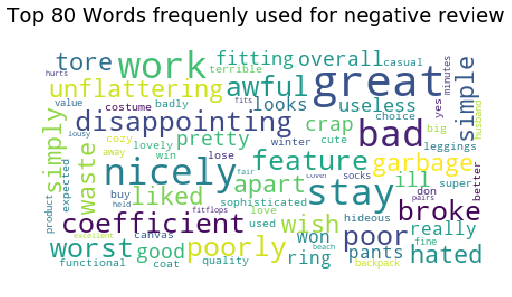

In [34]:
show_wordcloud(feature_coefs.sort_values(by='coefficient')[:80],title='Top 80 Words frequenly used for negative review')

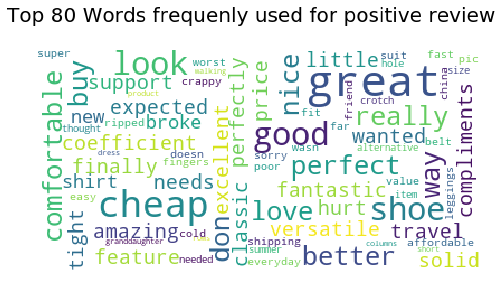

In [33]:
show_wordcloud(feature_coefs.sort_values(by='coefficient',ascending=False)[:80],title='Top 80 Words frequenly used for positive review')